# Longitudinal profile of 3D clusters

In [2]:
import sys
from dataclasses import dataclass
from enum import Enum, auto
import copy

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker
import mplhep as hep
plt.style.use(hep.style.CMS)
import hist

sys.path.append("../..")
from HistogramLib.histogram import HistogramKind
from HistogramLib.store import HistogramStore
from hists.parameters import beamEnergies
from hists.store import HistogramId

In [3]:
hist_folder = '/grid_mnt/data_cms_upgrade/cuisset/testbeam18/clue3d/v28'
clueParams = "single-file"
#clueParams = "cmssw"
histStore = HistogramStore(hist_folder, HistogramId)
datatypeToLegendMap = {"data":"Data"}

In [4]:
(histStore
        .get(HistogramId("Clus3DRechitsDistanceToImpact_AreaNormalized", clueParams, "data"))
        .getHistogram(HistogramKind.COUNT)
    )

Hist(
  IntCategory([20, 30, 50, 80, 100, 120, 150, 200, 250, 300], name='beamEnergy', label='Beam energy (GeV)'),
  StrCategory(['allTracksters', 'mainTrackster'], name='mainOrAllTracksters', label='For 3D clusters, whether to consider for each event all 3D clusters (allTracksters) or only the highest energy 3D cluster (mainTrackster)'),
  Integer(1, 10, name='clus3D_size', label='3D cluster size ie number of 2D clusters that make out this 3D cluster'),
  Integer(0, 30, name='layer', label='Layer number'),
  Regular(30, 0, 10, name='rechits_distanceToImpact', label='Distance of rechits to Delay Wire Chamber extrapolated impact position on layer (cm)'),
  storage=Double()) # Sum: 4324.0 (817403.0 with flow)

In [20]:
(histStore
    .get(HistogramId("Clus3DRechitsDistanceToImpact_AreaNormalized", clueParams, "data"))
    .getHistogram(HistogramKind.PROFILE)[{
        "beamEnergy" : hist.loc(20),
        "mainOrAllTracksters" : hist.loc("mainTrackster"),
        # Project on clus3D_size
        "layer" : hist.loc(5),
    }]
    .project("rechits_distanceToImpact")
).variances()

array([8.95053211e-05, 8.10788750e-06, 5.71973804e-07, 6.65116414e-08,
       2.35523244e-08, 1.50679164e-08, 1.46582454e-08, 2.17126446e-08,
       3.73360995e-08, 2.16927790e-08, 5.54230629e-08, 7.62858906e-08,
       2.33674589e-07, 1.79027529e-07, 1.95151926e-06, 8.29984143e-08,
       1.77196699e-06, 3.65201055e-07, 9.20586523e-08, 9.56404137e-06,
       1.74097891e-07,            nan, 1.12282304e-06,            nan,
                  nan,            nan,            nan,            nan,
                  nan,            nan])

In [25]:
def makePlot(layer:int, beamEnergy:int, datatypes):
    """ Plot distribution of distance to impact on a layer 
    See in custom_hists for how y is computed"""
    hists = [(histStore
        .get(HistogramId("Clus3DRechitsDistanceToImpact_AreaNormalized", clueParams, datatype))
        .getHistogram(HistogramKind.PROFILE)[{
            "beamEnergy" : hist.loc(beamEnergy),
            "mainOrAllTracksters" : hist.loc("mainTrackster"),
            # Project on clus3D_size
            "layer" : hist.loc(layer),
        }]
        .project("rechits_distanceToImpact")
        ) for datatype in datatypes]
    labels = [datatypeToLegendMap.get(datatype, datatype) for datatype in datatypes]
    
    plt.figure()
    plt.xlabel("Distance to extrapolated impact point (cm)")
    plt.xlim(0, 6)
    plt.ylabel(r"$\frac{1}{E_{cluster}} \frac{dE_{hit}}{dA}$")
    plt.yscale("log")
    
    hep.histplot(hists, label=labels, yerr=False)

    if "data" in datatypes:
        hep.cms.text("Preliminary")
    else:
        hep.cms.text("Simulation Preliminary")
    hep.cms.lumitext(f"Layer {layer} - $e^+$ {str(beamEnergy)} GeV")
    plt.legend()

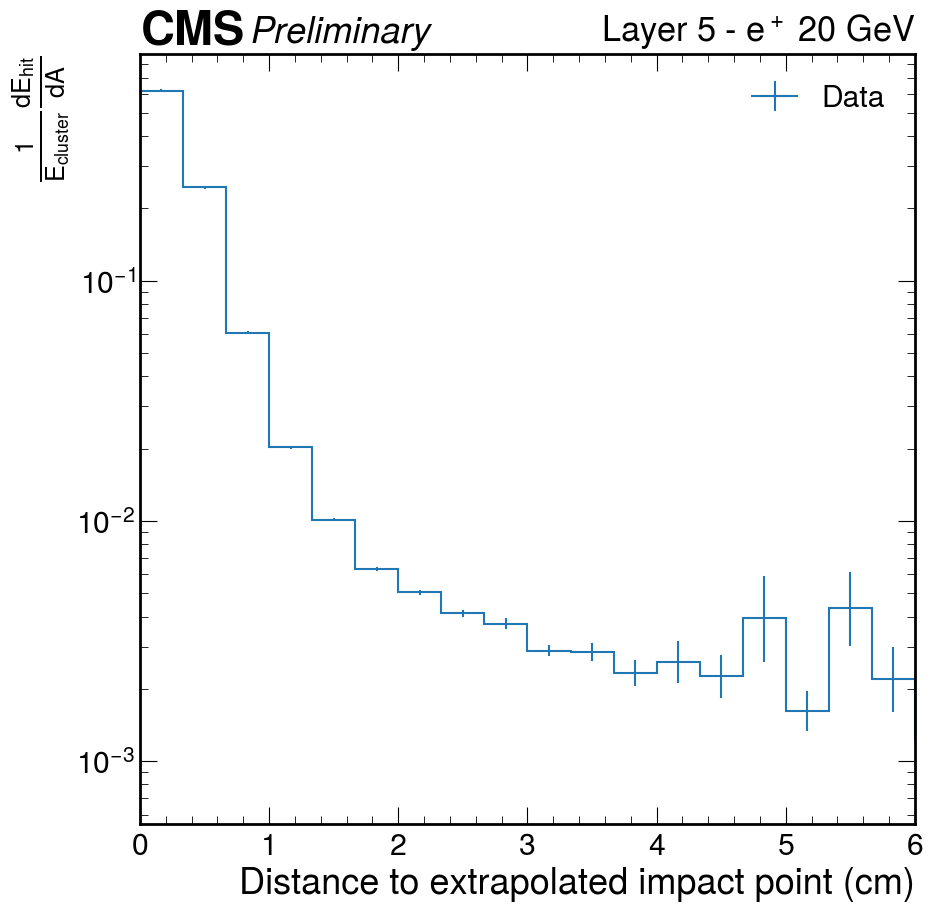

In [26]:
makePlot(layer=5, beamEnergy=20, datatypes=["data"])